Data Source: \
https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
city_day = pd.read_csv('city_day.csv')
station_day = pd.read_csv('station_day.csv')

In [ ]:
city_day # (29531, 16)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
station_day # (108035, 16)

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


In [ ]:
result = pd.DataFrame(index = city_day.columns)
result = pd.concat([pd.DataFrame(index = ['StationId'], columns = result.columns), result])
result['city_day'] = round((city_day.isna().sum() / len(city_day)) * 100, 2)
result['station_day'] = round((station_day.isna().sum() / len(station_day)) * 100, 2)
result = result.T
result

,StationId,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
city_day,NaN,0.0,0.0,15.57,37.72,12.13,12.14,14.17,34.97,6.97,13.05,13.62,19.04,27.23,61.32,15.85,15.85
station_day,0.0,NaN,0.0,20.02,39.53,15.83,15.32,14.35,44.53,12.03,23.33,23.67,29.12,35.82,78.81,19.45,19.45


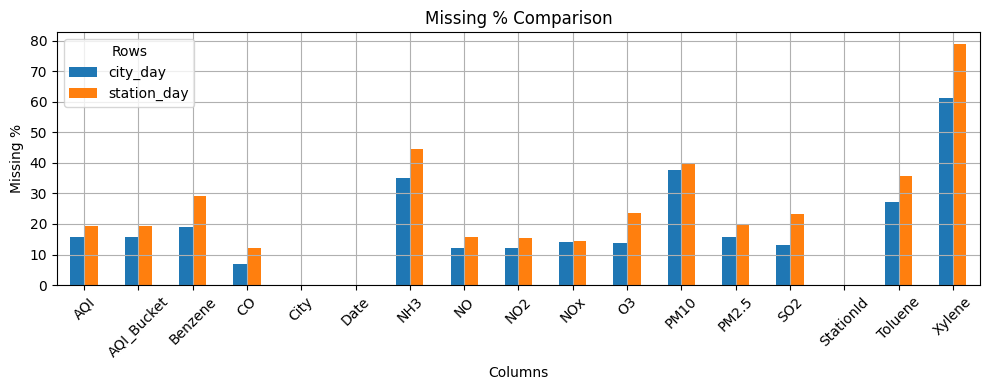

In [ ]:
df_long = result.reset_index().melt(id_vars='index', var_name='Parameter', value_name='Value')
df_long.columns = ['Category', 'Parameter', 'Value']

plt.figure(figsize=(10, 4))
pivot_df = df_long.pivot(index='Parameter', columns='Category', values='Value')
pivot_df.plot(kind='bar', ax=plt.gca())
plt.title('Missing % Comparison')
plt.xlabel('Columns')
plt.ylabel('Missing %')
plt.legend(title='Rows', loc='best')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# city_day (29531, 16)

In [ ]:
city_day
city_day.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [ ]:
result

,StationId,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
city_day,NaN,0.0,0.0,15.57,37.72,12.13,12.14,14.17,34.97,6.97,13.05,13.62,19.04,27.23,61.32,15.85,15.85
station_day,0.0,NaN,0.0,20.02,39.53,15.83,15.32,14.35,44.53,12.03,23.33,23.67,29.12,35.82,78.81,19.45,19.45


In [ ]:
city_names = city_day['City'].unique()

cities = {}
for city in city_names:
    cities[city] = city_day[city_day['City'] == city]

exclude_columns = ['City', 'Date', 'AQI_Bucket']
columns = ['rows', 'columns', 'start_date', 'end_date'] + [col for col in city_day.columns if col not in exclude_columns]
city_df = pd.DataFrame(index = city_names, columns = columns)

nrow = []
ncol = []
start_date = []
end_date = []
missing_percentages = []

for a in cities:
    nrow.append(cities[a].shape[0])
    ncol.append(cities[a].shape[1])
    start_date.append(cities[a]['Date'].iloc[0])
    end_date.append(cities[a]['Date'].iloc[-1])
    missing_percentages.append(round((1 - (cities[a].describe().iloc[0] / len(cities[a]['Date']))) * 100, 2))

city_df['rows'] = nrow
city_df['columns'] = ncol
city_df['start_date'] = start_date
city_df['end_date'] = end_date
for i in range(0, len(city_df['rows']), 1):
  city_df.iloc[i, 4:17] = missing_percentages[i]
city_df

,rows,columns,start_date,end_date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Ahmedabad,2009,16,2015-01-01,2020-07-01,31.26,79.74,30.31,30.26,29.57,100.0,30.31,31.86,34.1,24.04,24.04,24.09,33.6
Aizawl,113,16,2020-03-11,2020-07-01,1.77,0.88,0.0,0.0,0.0,0.0,0.0,0.0,7.96,13.27,13.27,100.0,1.77
Amaravati,951,16,2017-11-24,2020-07-01,6.2,5.78,5.78,5.78,5.78,5.78,10.2,6.83,5.78,7.89,7.89,28.29,11.57
Amritsar,1221,16,2017-02-27,2020-07-01,10.48,5.16,7.62,3.6,23.67,3.44,6.22,13.76,9.42,15.97,17.36,17.44,7.78
Bengaluru,2009,16,2015-01-01,2020-07-01,7.27,17.92,0.3,0.3,0.2,10.1,0.55,0.3,7.17,13.24,4.63,100.0,4.93
Bhopal,289,16,2019-09-17,2020-07-01,3.11,3.11,3.11,3.11,3.11,3.11,3.11,3.11,3.11,100.0,100.0,100.0,3.81
Brajrajnagar,938,16,2017-12-07,2020-07-01,19.72,18.44,25.91,24.95,18.66,24.09,15.99,20.58,21.64,18.44,100.0,100.0,23.99
Chandigarh,304,16,2019-09-02,2020-07-01,4.93,0.0,1.32,1.32,1.32,3.29,0.0,0.0,0.0,0.0,0.0,0.0,1.64
Chennai,2009,16,2015-01-01,2020-07-01,5.82,84.97,1.79,1.79,1.79,23.0,1.24,1.79,2.44,14.19,12.59,100.0,6.22
Coimbatore,386,16,2019-06-12,2020-07-01,2.07,1.81,14.25,2.85,1.04,31.87,0.78,0.78,0.78,0.78,0.78,100.0,10.88


In [ ]:
# how many regions?
len(city_df['AQI'])

26

In [ ]:
# find cities whose data is at full length
full_length_data = city_df[city_df['rows'] == 2009]
full_length_data

,rows,columns,start_date,end_date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Ahmedabad,2009,16,2015-01-01,2020-07-01,31.26,79.74,30.31,30.26,29.57,100.0,30.31,31.86,34.1,24.04,24.04,24.09,33.6
Bengaluru,2009,16,2015-01-01,2020-07-01,7.27,17.92,0.3,0.3,0.2,10.1,0.55,0.3,7.17,13.24,4.63,100.0,4.93
Chennai,2009,16,2015-01-01,2020-07-01,5.82,84.97,1.79,1.79,1.79,23.0,1.24,1.79,2.44,14.19,12.59,100.0,6.22
Delhi,2009,16,2015-01-01,2020-07-01,0.1,3.83,0.1,0.1,0.0,0.45,0.0,5.48,4.18,0.0,0.0,38.88,0.5
Lucknow,2009,16,2015-01-01,2020-07-01,5.08,100.0,1.19,1.19,16.13,49.98,1.39,3.19,1.34,4.93,6.77,100.0,5.77
Mumbai,2009,16,2015-01-01,2020-07-01,60.98,62.02,61.82,62.37,24.84,80.34,1.24,60.73,60.33,10.45,49.43,49.48,61.42


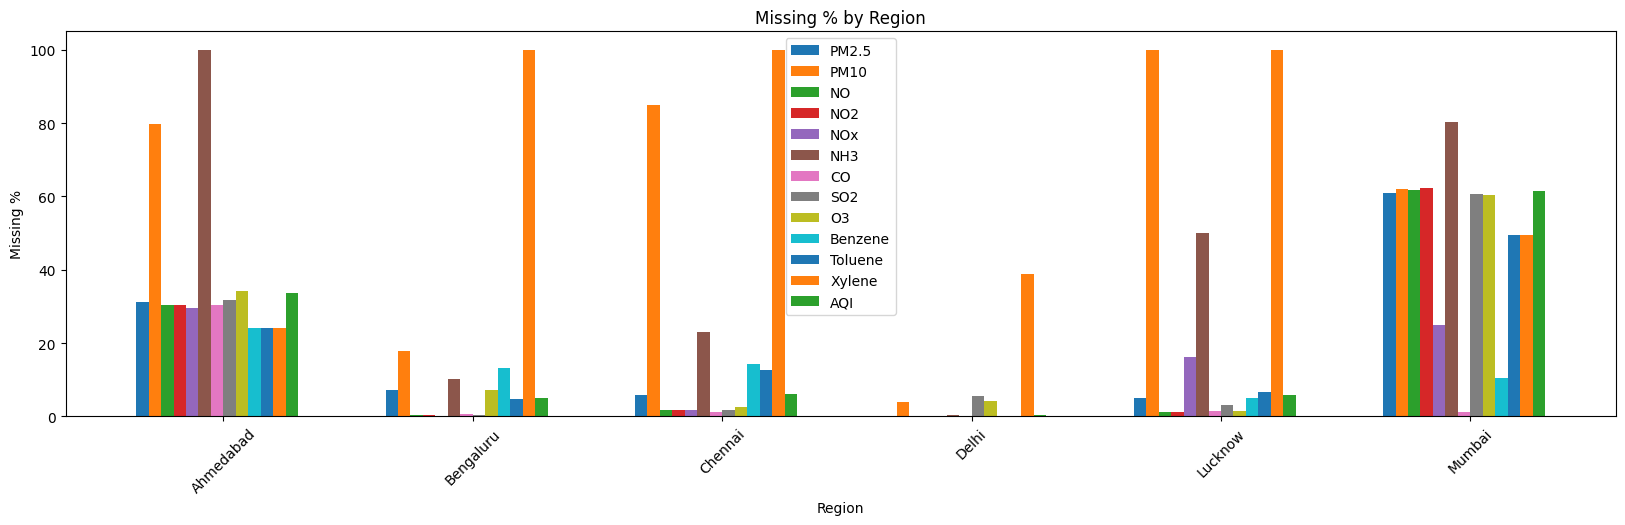

In [ ]:
# Plot the missing percentage for each region
data = full_length_data.iloc[:,4:]

# Plotting
fig, ax = plt.subplots(figsize=(20, 5))

bar_width = 0.05
index = np.arange(len(data.index))

for i, (columnName, columnData) in enumerate(data.items()):
    ax.bar(index + i * bar_width, columnData, bar_width, label=columnName)

ax.set_xlabel('Region')
ax.set_ylabel('Missing %')
ax.set_title('Missing % by Region')
ax.set_xticks(index + bar_width * (len(data.columns) / 2))
ax.set_xticklabels(data.index)
ax.legend(loc = 'best')

plt.xticks(rotation=45)
plt.show()

## Objectives
*   Forecast CO with Ahmedabad removed
*   Forecast AQI with Ahmedabad and Mumbai removed



In [ ]:
Bengaluru = cities['Bengaluru'].drop(columns=['AQI_Bucket']).reset_index(drop=True)
Bengaluru.to_csv('Bengaluru_day.csv', index = False)

In [ ]:
Chennai = cities['Chennai'].drop(columns=['AQI_Bucket']).reset_index(drop=True)
Chennai.to_csv('Chennai_day.csv', index = False)

In [ ]:
Delhi = cities['Delhi'].drop(columns=['AQI_Bucket']).reset_index(drop=True)
Delhi.to_csv('Delhi_day.csv', index = False)

In [ ]:
Lucknow = cities['Lucknow'].drop(columns=['AQI_Bucket']).reset_index(drop=True)
Lucknow.to_csv('Lucknow_day.csv', index = False)

In [ ]:
Mumbai = cities['Mumbai'].drop(columns=['AQI_Bucket']).reset_index(drop=True)
Mumbai.to_csv('Mumbai_day.csv', index = False)

# Split the hourly data

In [ ]:
city_hour = pd.read_csv('city_hour_preprocessed.csv')
city_hour

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,NO2_Indicator,NOx_Indicator,NH3_Indicator,CO_Indicator,SO2_Indicator,O3_Indicator,Benzene_Indicator,Toluene_Indicator,Xylene_Indicator,AQI_Indicator
0,Bengaluru,2015-01-01 01:00:00,NaN,NaN,2.04,12.40,7.58,19.10,0.19,4.05,...,1,1,1,1,1,1,1,1,0,0
1,Bengaluru,2015-01-01 02:00:00,NaN,NaN,2.20,12.11,7.54,17.81,0.21,4.23,...,1,1,1,1,1,1,0,1,0,0
2,Bengaluru,2015-01-01 03:00:00,NaN,NaN,1.66,10.82,6.52,17.42,0.30,4.28,...,1,1,1,1,1,1,0,1,0,0
3,Bengaluru,2015-01-01 04:00:00,NaN,NaN,1.92,10.32,6.46,16.86,0.13,4.14,...,1,1,1,1,1,1,0,1,0,0
4,Bengaluru,2015-01-01 05:00:00,NaN,NaN,1.94,9.82,6.22,16.35,0.15,4.26,...,1,1,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240955,Mumbai,2020-06-30 20:00:00,7.70,10.90,20.14,7.46,27.59,15.20,0.36,13.71,...,1,1,1,1,1,1,1,0,0,1
240956,Mumbai,2020-06-30 21:00:00,5.99,10.16,21.40,7.71,29.12,15.95,0.38,13.71,...,1,1,1,1,1,1,1,0,0,1
240957,Mumbai,2020-06-30 22:00:00,6.53,18.54,23.56,7.75,31.31,17.05,0.41,13.48,...,1,1,1,1,1,1,1,0,0,1
240958,Mumbai,2020-06-30 23:00:00,4.88,13.43,25.81,6.49,32.30,20.02,0.38,11.15,...,1,1,1,1,1,1,1,0,0,1


In [ ]:
city_hour = city_hour[['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
city_hour

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Bengaluru,2015-01-01 01:00:00,NaN,NaN,2.04,12.40,7.58,19.10,0.19,4.05,12.41,0.56,3.43,NaN,NaN
1,Bengaluru,2015-01-01 02:00:00,NaN,NaN,2.20,12.11,7.54,17.81,0.21,4.23,12.13,NaN,4.54,NaN,NaN
2,Bengaluru,2015-01-01 03:00:00,NaN,NaN,1.66,10.82,6.52,17.42,0.30,4.28,13.13,NaN,4.20,NaN,NaN
3,Bengaluru,2015-01-01 04:00:00,NaN,NaN,1.92,10.32,6.46,16.86,0.13,4.14,11.82,NaN,4.63,NaN,NaN
4,Bengaluru,2015-01-01 05:00:00,NaN,NaN,1.94,9.82,6.22,16.35,0.15,4.26,10.31,NaN,3.91,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240955,Mumbai,2020-06-30 20:00:00,7.70,10.90,20.14,7.46,27.59,15.20,0.36,13.71,8.22,0.44,NaN,NaN,54.0
240956,Mumbai,2020-06-30 21:00:00,5.99,10.16,21.40,7.71,29.12,15.95,0.38,13.71,6.60,0.10,NaN,NaN,53.0
240957,Mumbai,2020-06-30 22:00:00,6.53,18.54,23.56,7.75,31.31,17.05,0.41,13.48,6.06,0.36,NaN,NaN,54.0
240958,Mumbai,2020-06-30 23:00:00,4.88,13.43,25.81,6.49,32.30,20.02,0.38,11.15,6.05,0.72,NaN,NaN,53.0


In [ ]:
city_hour_names = city_hour['City'].unique()

cities_hour = {}
for city in city_hour_names:
    cities_hour[city] = city_hour[city_hour['City'] == city]
    print(city, cities_hour[city].shape)

Bengaluru (48192, 15)
Chennai (48192, 15)
Delhi (48192, 15)
Lucknow (48192, 15)
Mumbai (48192, 15)


In [ ]:
exclude_columns = ['City', 'Datetime', 'AQI_Bucket']
columns_hour = ['rows', 'columns', 'start_date', 'end_date'] + [col for col in city_hour.columns if col not in exclude_columns]
city_names = city_hour['City'].unique()
city_hour_df = pd.DataFrame(index = city_names, columns = columns_hour)

nrow = []
ncol = []
start_date = []
end_date = []
missing_percentages = []

for a in cities_hour:
    nrow.append(cities_hour[a].shape[0])
    ncol.append(cities_hour[a].shape[1])
    start_date.append(cities_hour[a]['Datetime'].iloc[0])
    end_date.append(cities_hour[a]['Datetime'].iloc[-1])
    missing_percentages.append(round((1 - (cities_hour[a].describe().iloc[0] / len(cities_hour[a]['Datetime']))) * 100, 2))

city_hour_df['rows'] = nrow
city_hour_df['columns'] = ncol
city_hour_df['start_date'] = start_date
city_hour_df['end_date'] = end_date
for i in range(0, len(city_hour_df['rows']), 1):
  city_hour_df.iloc[i, 4:17] = missing_percentages[i]
city_hour_df

,rows,columns,start_date,end_date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Bengaluru,48192,15,2015-01-01 01:00:00,2020-07-01 00:00:00,9.61,22.8,1.29,1.29,4.33,15.78,9.65,1.55,10.86,20.88,14.94,100.0,5.59
Chennai,48192,15,2015-01-01 01:00:00,2020-07-01 00:00:00,6.88,87.95,2.57,2.61,2.48,26.47,2.35,2.66,3.75,18.67,18.38,100.0,7.35
Delhi,48192,15,2015-01-01 01:00:00,2020-07-01 00:00:00,0.78,5.02,0.62,0.68,0.05,2.03,0.76,5.92,4.57,0.08,0.05,39.23,1.03
Lucknow,48192,15,2015-01-01 01:00:00,2020-07-01 00:00:00,6.56,100.0,2.78,2.67,18.17,52.01,17.2,5.47,2.82,8.93,11.02,100.0,6.74
Mumbai,48192,15,2015-01-01 01:00:00,2020-07-01 00:00:00,62.27,63.9,63.48,63.62,27.26,80.41,3.92,62.3,62.1,13.55,51.42,52.14,62.29


In [ ]:
Bengaluru_hour = cities_hour['Bengaluru'].reset_index(drop=True)
Bengaluru_hour.to_csv('Bengaluru_hour.csv', index = False)

Chennai_hour = cities_hour['Chennai'].reset_index(drop=True)
Chennai_hour.to_csv('Chennai_hour.csv', index = False)

Delhi_hour = cities_hour['Delhi'].reset_index(drop=True)
Delhi_hour.to_csv('Delhi_hour.csv', index = False)

Lucknow_hour = cities_hour['Lucknow'].reset_index(drop=True)
Lucknow_hour.to_csv('Lucknow_hour.csv', index = False)

Mumbai_hour = cities_hour['Mumbai'].reset_index(drop=True)
Mumbai_hour.to_csv('Mumbai_hour.csv', index = False)